## 1. Чтение данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [2]:
train = pd.read_csv('train.csv', sep=',', index_col=0)

In [3]:
test = pd.read_csv('test.csv', sep=',', index_col=0)

## 2. Разведочный анализ данных 

In [4]:
train.head()

,birth_date,job,marital,education,default,housing,loan,contact_date,contact,campaign,pdays,previous,poutcome,y
0,1957-08-23,blue-collar,married,basic.4y,unknown,no,no,2009-05-06,cellular,3,999,0,nonexistent,0
1,1957-07-02,admin.,married,university.degree,unknown,yes,no,2008-07-24,cellular,11,999,0,nonexistent,0
2,1970-05-12,admin.,divorced,high.school,no,no,no,2008-05-09,telephone,1,999,0,nonexistent,0
3,1960-08-24,management,single,university.degree,no,yes,yes,2009-05-05,cellular,1,999,1,failure,0
4,1963-05-23,services,married,high.school,no,yes,no,2008-06-03,telephone,7,999,0,nonexistent,0


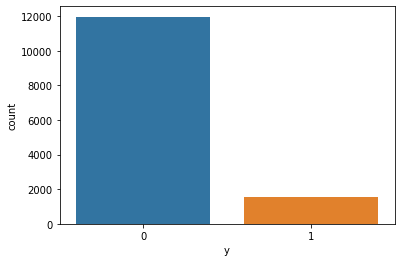

In [5]:
target = 'y'
sns.countplot(train[target])

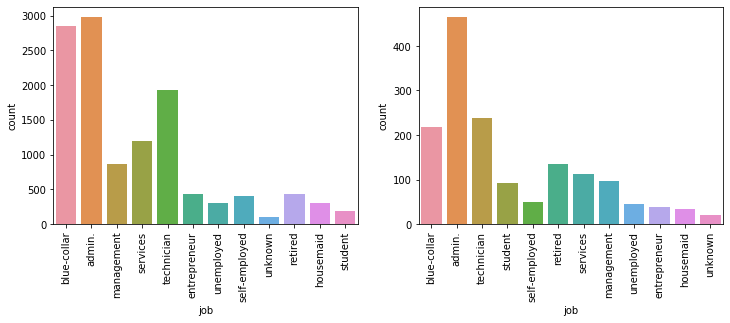

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_xticks(range(11))
axes[0].set_xticklabels(train[train[target] == 0]['job'].unique(), rotation=90)
axes[1].set_xticks(range(11))
axes[1].set_xticklabels(train[train[target] == 1]['job'].unique(), rotation=90)
sns.countplot(train[train[target] == 0]['job'], ax=axes[0])
sns.countplot(train[train[target] == 1]['job'], ax=axes[1])

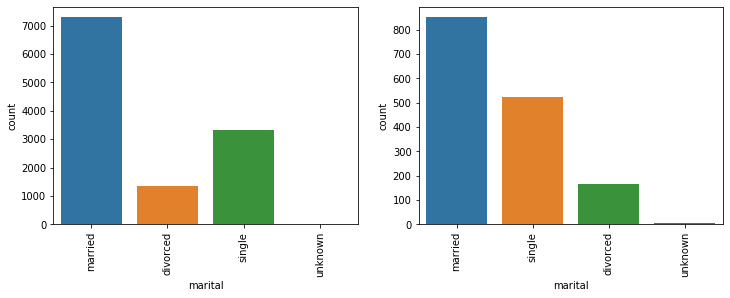

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_xticks(range(4))
axes[0].set_xticklabels(train[train[target] == 0]['marital'].unique(), rotation=90)
axes[1].set_xticks(range(4))
axes[1].set_xticklabels(train[train[target] == 1]['marital'].unique(), rotation=90)
sns.countplot(train[train[target] == 0]['marital'], ax=axes[0])
sns.countplot(train[train[target] == 1]['marital'], ax=axes[1])

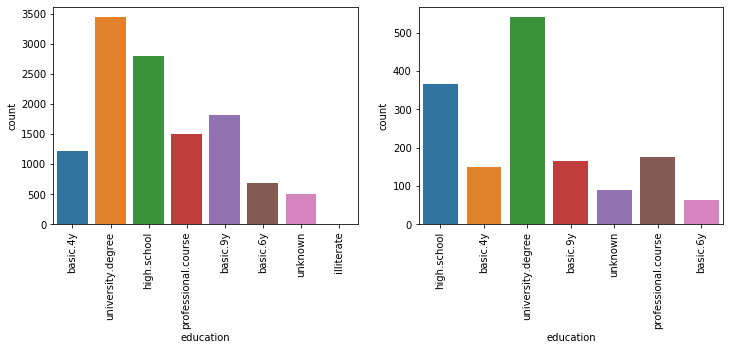

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_xticks(range(8))
axes[0].set_xticklabels(train[train[target] == 0]['education'].unique(), rotation=90)
axes[1].set_xticks(range(8))
axes[1].set_xticklabels(train[train[target] == 1]['education'].unique(), rotation=90)
sns.countplot(train[train[target] == 0]['education'], ax=axes[0])
sns.countplot(train[train[target] == 1]['education'], ax=axes[1])

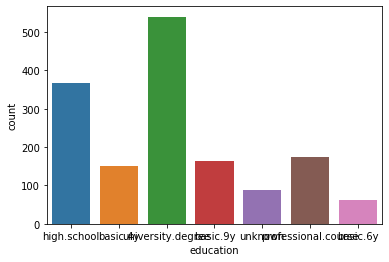

In [9]:
sns.countplot(train[train[target] == 1]['education'])

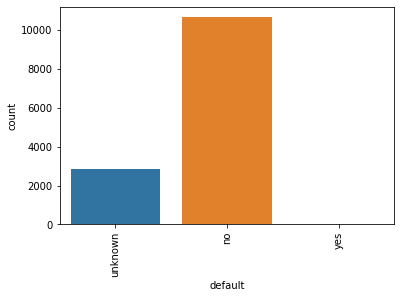

In [10]:
sns.countplot(train['default'])
_ = plt.xticks(rotation=90)

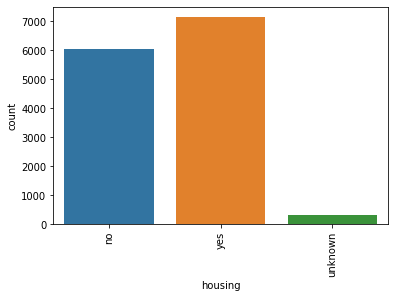

In [11]:
sns.countplot(train['housing'])
_ = plt.xticks(rotation=90)

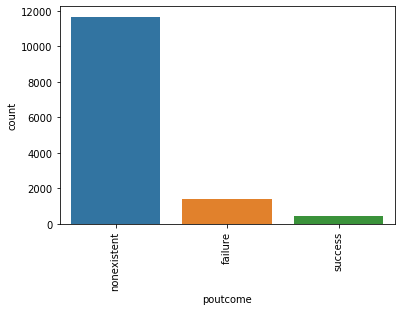

In [12]:
sns.countplot(train['poutcome'])
_ = plt.xticks(rotation=90)

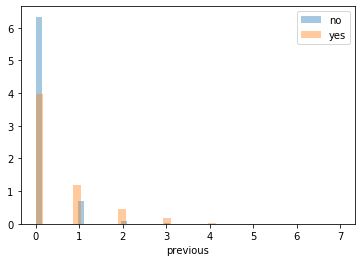

In [13]:
sns.distplot(train[train['y'] == 0]['previous'], kde=False, norm_hist=True, label='no')
sns.distplot(train[train['y'] == 1]['previous'], kde=False, norm_hist=True, label='yes')
plt.legend()

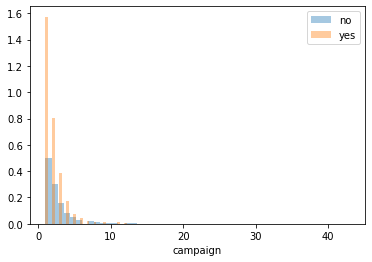

In [14]:
sns.distplot(train[train['y'] == 0]['campaign'], kde=False, norm_hist=True, label='no')
sns.distplot(train[train['y'] == 1]['campaign'], kde=False, norm_hist=True, label='yes')
plt.legend()

## 3. Генерация признаков

In [15]:
train['contact_date'] = train['contact_date'].map(pd.to_datetime)
train['birth_date'] = train['birth_date'].map(pd.to_datetime)

test['contact_date'] = test['contact_date'].map(pd.to_datetime)
test['birth_date'] = test['birth_date'].map(pd.to_datetime)

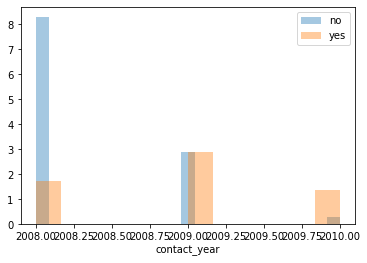

In [16]:
train['contact_year'] = train['contact_date'].map(lambda v: v.year)
test['contact_year'] = test['contact_date'].map(lambda v: v.year)
sns.distplot(train[train['y'] == 0]['contact_year'], kde=False, norm_hist=True, label='no')
sns.distplot(train[train['y'] == 1]['contact_year'], kde=False, norm_hist=True, label='yes')
plt.legend()

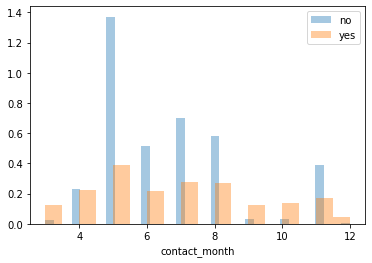

In [17]:
train['contact_month'] = train['contact_date'].map(lambda v: v.month)
test['contact_month'] = test['contact_date'].map(lambda v: v.month)
sns.distplot(train[train['y'] == 0]['contact_month'], kde=False, norm_hist=True, label='no')
sns.distplot(train[train['y'] == 1]['contact_month'], kde=False, norm_hist=True, label='yes')
plt.legend()

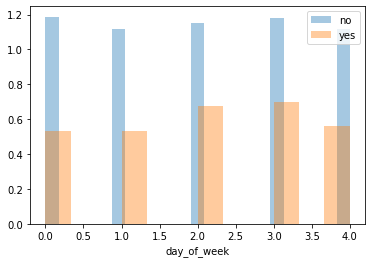

In [18]:
train['day_of_week'] = train['contact_date'].dt.dayofweek
test['day_of_week'] = test['contact_date'].dt.dayofweek
sns.distplot(train[train['y'] == 0]['day_of_week'], kde=False, norm_hist=True, label='no')
sns.distplot(train[train['y'] == 1]['day_of_week'], kde=False, norm_hist=True, label='yes')
plt.legend()

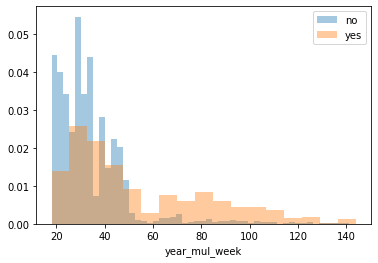

In [19]:
year_dict = {
    2008: 1,
    2009: 2,
    2010: 3
}

train['year_mul_week'] = train['contact_year'].map(lambda v: year_dict[v]) * train['contact_date'].dt.week
test['year_mul_week'] = test['contact_year'].map(lambda v: year_dict[v]) * test['contact_date'].dt.week
sns.distplot(train[train['y'] == 0]['year_mul_week'], kde=False, norm_hist=True, label='no')
sns.distplot(train[train['y'] == 1]['year_mul_week'], kde=False, norm_hist=True, label='yes')
plt.legend()

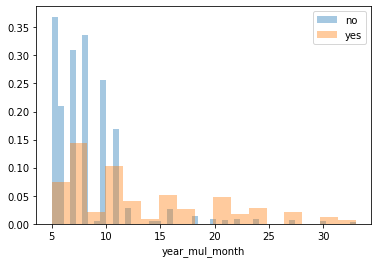

In [20]:
train['year_mul_month'] = train['contact_year'].map(lambda v: year_dict[v]) * train['contact_month']
test['year_mul_month'] = test['contact_year'].map(lambda v: year_dict[v]) * test['contact_month']
sns.distplot(train[train['y'] == 0]['year_mul_month'], kde=False, norm_hist=True, label='no')
sns.distplot(train[train['y'] == 1]['year_mul_month'], kde=False, norm_hist=True, label='yes')
plt.legend()

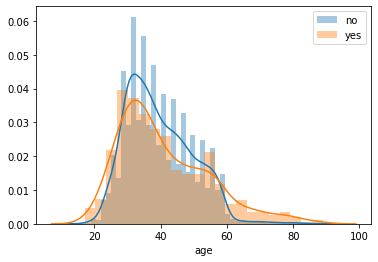

In [21]:
train['age'] = (train['contact_date'] - train['birth_date']).map(lambda v: v.days // 365)
test['age'] = (test['contact_date'] - test['birth_date']).map(lambda v: v.days // 365)
sns.distplot(train[train['y'] == 0]['age'], kde=True, norm_hist=True, label='no')
sns.distplot(train[train['y'] == 1]['age'], kde=True, norm_hist=True, label='yes')
plt.legend()

In [22]:
train['job_marital'] = train['job'] + '_' + train['marital']
test['job_marital'] = test['job'] + '_' + test['marital']

In [23]:
train['edu_job'] = train['education'] + '_' + train['job']
test['edu_job'] = test['education'] + '_' + test['job']

In [24]:
train.head()

,birth_date,job,marital,education,default,housing,loan,contact_date,contact,campaign,pdays,previous,poutcome,y,contact_year,contact_month,day_of_week,year_mul_week,year_mul_month,age,job_marital,edu_job
0,1957-08-23,blue-collar,married,basic.4y,unknown,no,no,2009-05-06,cellular,3,999,0,nonexistent,0,2009,5,2,38,10,51,blue-collar_married,basic.4y_blue-collar
1,1957-07-02,admin.,married,university.degree,unknown,yes,no,2008-07-24,cellular,11,999,0,nonexistent,0,2008,7,3,30,7,51,admin._married,university.degree_admin.
2,1970-05-12,admin.,divorced,high.school,no,no,no,2008-05-09,telephone,1,999,0,nonexistent,0,2008,5,4,19,5,38,admin._divorced,high.school_admin.
3,1960-08-24,management,single,university.degree,no,yes,yes,2009-05-05,cellular,1,999,1,failure,0,2009,5,1,38,10,48,management_single,university.degree_management
4,1963-05-23,services,married,high.school,no,yes,no,2008-06-03,telephone,7,999,0,nonexistent,0,2008,6,1,23,6,45,services_married,high.school_services


## 4. Обучение моделей

### One hot encoding

In [25]:
from sklearn.preprocessing import OneHotEncoder
from copy import copy

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

cat_features = train.dtypes[train.dtypes == 'object'].index.values.tolist()
one_hot_enc = OneHotEncoder(handle_unknown='ignore')
feature2encoder = dict.fromkeys(cat_features, None)
for feature in cat_features:
    one_hot_enc.fit(train[[feature]])
    feature2encoder[feature] = copy(one_hot_enc)
    encoded_feature_train = one_hot_enc.transform(train[[feature]])
    encoded_feature_test = one_hot_enc.transform(test[[feature]])
    encoded_feature_train = pd.DataFrame(encoded_feature_train.todense(), columns=one_hot_enc.get_feature_names().tolist())
    encoded_feature_test = pd.DataFrame(encoded_feature_test.todense(), columns=one_hot_enc.get_feature_names().tolist())
    train = pd.concat([train, encoded_feature_train], axis=1)
    test = pd.concat([test, encoded_feature_test], axis=1)

job
marital
education
default
housing
loan
contact
poutcome
job_marital
edu_job


### Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature2scaler = dict.fromkeys(['campaign', 'contact_year', 'contact_month', 'day_of_week', 'year_mul_week', 'year_mul_month', 'age', 'pdays'], None)
for feature in feature2scaler:
    scaler.fit(train[[feature]])
    train[feature] = scaler.transform(train[[feature]])
    test[feature] = scaler.transform(test[[feature]])
    feature2scaler[feature] = copy(scaler)

campaign
contact_year
contact_month
day_of_week
year_mul_week
year_mul_month
age
pdays


In [51]:
numeric_features = train.dtypes[train.dtypes == 'float64'].index.values.tolist()

### Splitting

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train[numeric_features], train['y'], shuffle=True, test_size=0.3)

### Logistic regression

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

logit = LogisticRegression().fit(X_train, y_train)
probs = logit.predict_proba(X_valid)[:, 1]
roc_auc_score(y_valid, probs)

0.7836943449081406

### Feature importance

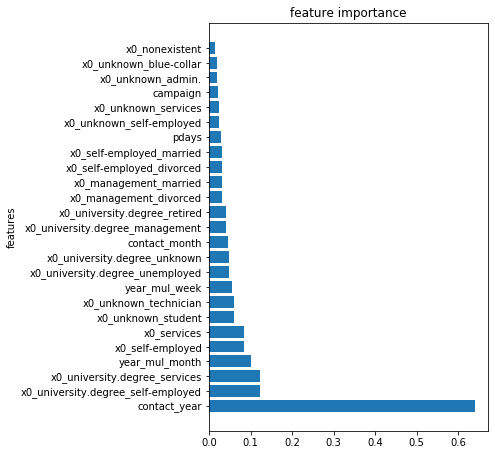

In [113]:
from collections import OrderedDict

scores = logit.coef_[0] * logit.coef_[0]
feature_dict = dict(zip(numeric_features, scores))
feature_dict = OrderedDict(sorted(feature_dict.items(), key=lambda kv: kv[1], reverse=True))

plt.figure(figsize=(5, 0.3 * 25))
plt.barh(list(feature_dict.keys())[:25], list(feature_dict.values())[:25])
plt.title('feature importance')
_ = plt.ylabel('features')

In [115]:
from sklearn.model_selection import GridSearchCV

gs_logit = GridSearchCV(cv=5,
       estimator=LogisticRegression(),
       param_grid={'C': [0.1, 0.3, 0.5, 0.7, 1, 1.5, 3]},
       scoring='roc_auc',
       n_jobs=-1,
       verbose=1)
gs_logit.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 1, 1.5, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [116]:
best_logit = gs_logit.best_estimator_

### Random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
probs = random_forest.predict_proba(X_valid)[:, 1]
roc_auc_score(y_valid, probs)

0.7312733869714395

In [79]:
from sklearn.preprocessing import LabelEncoder
from copy import copy

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

cat_features = train.dtypes[train.dtypes == 'object'].index.values.tolist()

all_data = train[cat_features].append(test[cat_features], ignore_index=True)

label_enc = LabelEncoder()
feature2label_encoder = dict.fromkeys(cat_features, None)
for feature in cat_features:
    label_enc.fit(all_data[[feature]])
    feature2label_encoder[feature] = copy(label_enc)
    encoded_feature_train = label_enc.transform(train[[feature]])
    encoded_feature_test = label_enc.transform(test[[feature]])
    encoded_feature_train = pd.DataFrame(encoded_feature_train, columns=['label_' + feature])
    encoded_feature_test = pd.DataFrame(encoded_feature_test, columns=['label_' + feature])
    train = pd.concat([train, encoded_feature_train], axis=1)
    test = pd.concat([test, encoded_feature_test], axis=1)

In [84]:
tree_features = [feature for feature in train.columns if not feature.startswith('x0') and feature not in cat_features + ['y', 'birth_date', 'contact_date']]

In [131]:
X_train, X_valid, y_train, y_valid = train_test_split(train[tree_features], train['y'], shuffle=True, test_size=0.3)

In [132]:
random_forest = RandomForestClassifier(**gs.best_params_)
random_forest.fit(X_train, y_train)
probs = random_forest.predict_proba(X_valid)[:, 1]
roc_auc_score(y_valid, probs)

0.8012496100228486

In [133]:
gs_tree = GridSearchCV(cv=5,
       estimator=RandomForestClassifier(),
       param_grid={
           'n_estimators': [50, 80, 100, 150, 250],
           'max_depth': [None, 6, 8, 10, 12],
           'min_samples_split': [2, 4, 8],
           'min_samples_leaf': [1, 2, 4]
       },
       scoring='roc_auc',
       n_jobs=-1,
       verbose=1)
gs_tree.fit(X_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:  2.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [134]:
best_tree = gs_tree.best_estimator_

In [137]:
best_random_forest = RandomForestClassifier(**gs.best_params_)
best_random_forest.fit(X_train, y_train)
probs = best_random_forest.predict_proba(X_valid)[:, 1]
roc_auc_score(y_valid, probs)

0.8032988310002831

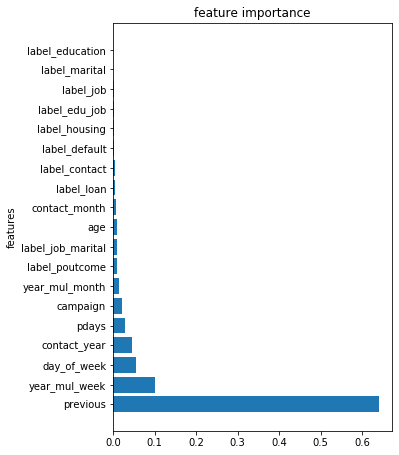

In [138]:
scores_tree = best_random_forest.feature_importances_
feature_dict = dict(zip(tree_features, scores))
feature_dict = OrderedDict(sorted(feature_dict.items(), key=lambda kv: kv[1], reverse=True))

plt.figure(figsize=(5, 0.3 * 25))
plt.barh(list(feature_dict.keys())[:25], list(feature_dict.values())[:25])
plt.title('feature importance')
_ = plt.ylabel('features')

### CatBoost

In [141]:
work_features = list(feature2scaler.keys()) + cat_features
X_train, X_valid, y_train, y_valid = train_test_split(train[work_features], train['y'], shuffle=True, test_size=0.3)

In [122]:
from catboost import CatBoostClassifier

work_model = CatBoostClassifier(eval_metric='AUC',
                                thread_count=4,
                                cat_features=cat_features,
                                border_count=128,
                                depth=7,
                                l2_leaf_reg=3,
                                learning_rate=0.01)

work_model.fit(X_train, y_train, plot=True, use_best_model=True, eval_set=(X_valid, y_valid))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7222010	best: 0.7222010 (0)	total: 26.7ms	remaining: 26.7s
1:	test: 0.7740493	best: 0.7740493 (1)	total: 50.1ms	remaining: 25s
2:	test: 0.7864986	best: 0.7864986 (2)	total: 65.6ms	remaining: 21.8s
3:	test: 0.7869949	best: 0.7869949 (3)	total: 80.6ms	remaining: 20.1s
4:	test: 0.7872208	best: 0.7872208 (4)	total: 90.9ms	remaining: 18.1s
5:	test: 0.7870028	best: 0.7872208 (4)	total: 99.6ms	remaining: 16.5s
6:	test: 0.7867460	best: 0.7872208 (4)	total: 106ms	remaining: 15.1s
7:	test: 0.7906147	best: 0.7906147 (7)	total: 120ms	remaining: 14.9s
8:	test: 0.7911583	best: 0.7911583 (8)	total: 132ms	remaining: 14.5s
9:	test: 0.7907406	best: 0.7911583 (8)	total: 147ms	remaining: 14.6s
10:	test: 0.7927100	best: 0.7927100 (10)	total: 166ms	remaining: 14.9s
11:	test: 0.7927794	best: 0.7927794 (11)	total: 179ms	remaining: 14.7s
12:	test: 0.7922914	best: 0.7927794 (11)	total: 193ms	remaining: 14.7s
13:	test: 0.7919838	best: 0.7927794 (11)	total: 206ms	remaining: 14.5s
14:	test: 0.7919502	be

In [125]:
grid = {'learning_rate': [0.03, 0.05, 0.07],
        'depth': [8, 9, 10],
        'max_bin': [64, 128, 256],
        'l2_leaf_reg': [3, 4, 5]
       }

model = CatBoostClassifier(eval_metric='AUC',
                           thread_count=4,
                           cat_features=cat_features)

grid_search_catboost_result = model.grid_search(grid,
                                       cv=4,
                                       calc_cv_statistics=True,
                                       search_by_train_test_split=True,
                                       stratified=True,
                                       X=train[work_features], 
                                       y=train[target], 
                                       verbose=2,
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.7667922	best: 0.7667922 (0)	total: 25.5s	remaining: 34m 3s
2:	loss: 0.7650581	best: 0.7667922 (0)	total: 1m 20s	remaining: 34m 58s
4:	loss: 0.7661664	best: 0.7667922 (0)	total: 2m 19s	remaining: 35m 17s
6:	loss: 0.7647472	best: 0.7667922 (0)	total: 3m 7s	remaining: 33m 1s
8:	loss: 0.7687151	best: 0.7700160 (7)	total: 3m 53s	remaining: 31m 7s
10:	loss: 0.7645850	best: 0.7700160 (7)	total: 5m 6s	remaining: 32m 32s
12:	loss: 0.7659351	best: 0.7700160 (7)	total: 6m 17s	remaining: 32m 54s
14:	loss: 0.7618277	best: 0.7700160 (7)	total: 7m 24s	remaining: 32m 36s
16:	loss: 0.7640130	best: 0.7700160 (7)	total: 8m 27s	remaining: 31m 49s
18:	loss: 0.7659019	best: 0.7700160 (7)	total: 9m 37s	remaining: 31m 24s
20:	loss: 0.7629107	best: 0.7717229 (19)	total: 10m 56s	remaining: 31m 16s
22:	loss: 0.7674819	best: 0.7717229 (19)	total: 12m 14s	remaining: 30m 52s
24:	loss: 0.7684440	best: 0.7717229 (19)	total: 13m 33s	remaining: 30m 21s
26:	loss: 0.7651704	best: 0.7717229 (19)	total: 14m 51s	

In [126]:
best_catboost_params = list(grid_search_catboost_result.values())[0]

In [127]:
best_catboost_params

{'border_count': 64, 'depth': 10, 'l2_leaf_reg': 3, 'learning_rate': 0.05}

In [128]:
work_model = CatBoostClassifier(eval_metric='AUC',
                                thread_count=4,
                                cat_features=cat_features,
                                **best_catboost_params)

work_model.fit(X_train, y_train, plot=True, use_best_model=True, eval_set=(X_valid, y_valid))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7236814	best: 0.7236814 (0)	total: 19.1ms	remaining: 19.1s
1:	test: 0.7523723	best: 0.7523723 (1)	total: 29.3ms	remaining: 14.6s
2:	test: 0.7840285	best: 0.7840285 (2)	total: 51.9ms	remaining: 17.2s
3:	test: 0.7932438	best: 0.7932438 (3)	total: 77.1ms	remaining: 19.2s
4:	test: 0.7922153	best: 0.7932438 (3)	total: 84.7ms	remaining: 16.9s
5:	test: 0.7920282	best: 0.7932438 (3)	total: 95.7ms	remaining: 15.9s
6:	test: 0.7924055	best: 0.7932438 (3)	total: 107ms	remaining: 15.2s
7:	test: 0.7937025	best: 0.7937025 (7)	total: 131ms	remaining: 16.3s
8:	test: 0.7937404	best: 0.7937404 (8)	total: 137ms	remaining: 15.1s
9:	test: 0.7936248	best: 0.7937404 (8)	total: 144ms	remaining: 14.3s
10:	test: 0.7934193	best: 0.7937404 (8)	total: 148ms	remaining: 13.3s
11:	test: 0.7933142	best: 0.7937404 (8)	total: 160ms	remaining: 13.2s
12:	test: 0.7940159	best: 0.7940159 (12)	total: 167ms	remaining: 12.7s
13:	test: 0.7939731	best: 0.7940159 (12)	total: 173ms	remaining: 12.2s
14:	test: 0.7943705	be

## 5. Построение кривой ROC_AUC для всех моделей с выводом

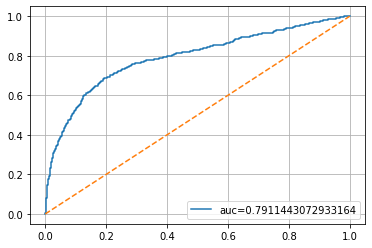

In [117]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = best_logit.predict_proba(X_valid)[::,1]
fpr, tpr, _ = roc_curve(y_valid,  y_pred_proba)
auc = roc_auc_score(y_valid, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1],[0, 1], '--')
plt.legend(loc=4)
plt.grid(True)
plt.show()

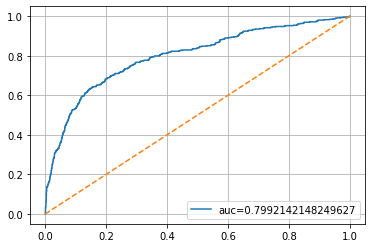

In [139]:
y_pred_proba = best_tree.predict_proba(X_valid)[::,1]
fpr, tpr, _ = roc_curve(y_valid,  y_pred_proba)
auc = roc_auc_score(y_valid, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1],[0, 1], '--')
plt.legend(loc=4)
plt.grid(True)
plt.show()

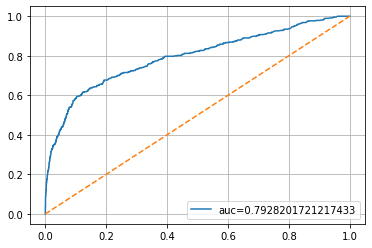

In [142]:
y_pred_proba = work_model.predict_proba(X_valid)[::,1]
fpr, tpr, _ = roc_curve(y_valid,  y_pred_proba)
auc = roc_auc_score(y_valid, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1],[0, 1], '--')
plt.legend(loc=4)
plt.grid(True)
plt.show()

## 6. Генерация сабмита

In [107]:
test[numeric_features]

,campaign,pdays,contact_year,contact_month,day_of_week,year_mul_week,year_mul_month,age,x0_admin.,x0_admin.,x0_blue-collar,x0_blue-collar,x0_entrepreneur,x0_entrepreneur,x0_housemaid,x0_housemaid,x0_management,x0_management,x0_retired,x0_retired,x0_self-employed,x0_self-employed,x0_services,x0_services,x0_student,x0_student,x0_technician,x0_technician,x0_unemployed,x0_unemployed,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_divorced,x0_divorced,x0_married,x0_married,x0_single,x0_single,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_basic.4y,x0_basic.4y,x0_basic.6y,x0_basic.6y,x0_basic.9y,x0_basic.9y,x0_high.school,x0_high.school,x0_illiterate,x0_illiterate,x0_professional.course,x0_professional.course,x0_university.degree,x0_university.degree,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_no,x0_no,x0_no,x0_no,x0_no,x0_no,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_yes,x0_yes,x0_yes,x0_yes,x0_yes,x0_yes,x0_no,x0_no,x0_no,x0_no,x0_no,x0_no,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_yes,x0_yes,x0_yes,x0_yes,x0_yes,x0_yes,x0_no,x0_no,x0_no,x0_no,x0_no,x0_no,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_unknown,x0_yes,x0_yes,x0_yes,x0_yes,x0_yes,x0_yes,x0_cellular,x0_cellular,x0_telephone,x0_telephone,x0_failure,x0_failure,x0_nonexistent,x0_nonexistent,x0_success,x0_success,x0_admin._divorced,x0_admin._divorced,x0_admin._married,x0_admin._married,x0_admin._single,x0_admin._single,x0_admin._unknown,x0_admin._unknown,x0_blue-collar_divorced,x0_blue-collar_divorced,x0_blue-collar_married,x0_blue-collar_married,x0_blue-collar_single,x0_blue-collar_single,x0_blue-collar_unknown,x0_blue-collar_unknown,x0_entrepreneur_divorced,x0_entrepreneur_divorced,x0_entrepreneur_married,x0_entrepreneur_married,x0_entrepreneur_single,x0_entrepreneur_single,x0_entrepreneur_unknown,x0_entrepreneur_unknown,x0_housemaid_divorced,x0_housemaid_divorced,x0_housemaid_married,x0_housemaid_married,x0_housemaid_single,x0_housemaid_single,x0_housemaid_unknown,x0_housemaid_unknown,x0_management_divorced,x0_management_divorced,x0_management_married,x0_management_married,x0_management_single,x0_management_single,x0_retired_divorced,x0_retired_divorced,x0_retired_married,x0_retired_married,x0_retired_single,x0_retired_single,x0_self-employed_divorced,x0_self-employed_divorced,x0_self-employed_married,x0_self-employed_married,x0_self-employed_single,x0_self-employed_single,x0_self-employed_unknown,x0_self-employed_unknown,x0_services_divorced,x0_services_divorced,x0_services_married,x0_services_married,x0_services_single,x0_services_single,x0_services_unknown,x0_services_unknown,x0_student_divorced,x0_student_divorced,x0_student_married,x0_student_married,x0_student_single,x0_student_single,x0_student_unknown,x0_student_unknown,x0_technician_divorced,x0_technician_divorced,x0_technician_married,x0_technician_married,x0_technician_single,x0_technician_single,x0_technician_unknown,x0_technician_unknown,x0_unemployed_divorced,x0_unemployed_divorced,x0_unemployed_married,x0_unemployed_married,x0_unemployed_single,x0_unemployed_single,x0_unemployed_unknown,x0_unemployed_unknown,x0_unknown_divorced,x0_unknown_divorced,x0_unknown_married,x0_unknown_married,x0_unknown_single,x0_unknown_single,x0_unknown_unknown,x0_unknown_unknown,x0_unknown_unknown,x0_unknown_unknown,x0_basic.4y_admin.,x0_basic.4y_admin.,x0_basic.4y_blue-collar,x0_basic.4y_blue-collar,x0_basic.4y_entrepreneur,x0_basic.4y_entrepreneur,x0_basic.4y_housemaid,x0_basic.4y_housemaid,x0_basic.4y_mana

In [118]:
y_test_pred = best_logit.predict_proba(test[numeric_features])[:, 1]
pd.DataFrame.from_dict({'id': test.index, 'y': y_test_pred}).to_csv('submission_logit.csv', index=False)

In [119]:
y_test_pred = random_forest.predict_proba(test[tree_features])[:, 1]
pd.DataFrame.from_dict({'id': test.index, 'y': y_test_pred}).to_csv('submission_tree.csv', index=False)

In [129]:
y_test_pred = work_model.predict_proba(test[work_features])[:, 1]
pd.DataFrame.from_dict({'id': test.index, 'y': y_test_pred}).to_csv('submission_cat.csv', index=False)